In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import feature
import os
from utils import *

In [2]:
data_path = './data_fall/rgb/'
data_file = np.array(sorted(os.listdir(data_path)))

In [3]:
proj = getdata(data_path,'./data_fall/labels.csv')

In [13]:
idx = np.random.permutation(proj.n_index)
label_train,label_test = train_test_split(proj.label,0.7,idx)

In [4]:
first_frame = cv2.imread('./data_fall/bg.jpg')
first_gray = cv2.cvtColor(first_frame,cv2.COLOR_BGR2GRAY)
first_gray = cv2.GaussianBlur(first_gray,(5,5),0)

In [5]:
mask_img = []
for i in range(proj.n_index):
    frame = proj.get1img(i,mode='df')
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.GaussianBlur(gray_frame,(5,5),0)
    diff = cv2.absdiff(first_gray,gray_frame)
    ret,diff = cv2.threshold(diff,40,255,cv2.THRESH_BINARY)
    mask_img.append(diff)
    
mask_img = np.array(mask_img)    

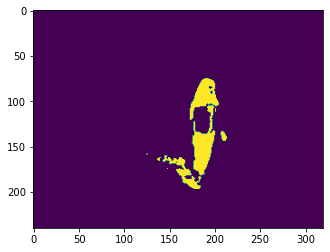

In [6]:
plt.imshow(mask_img[4])

In [16]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report

In [196]:
area_feature = []
for i in range(proj.n_index):
    area_feature.append( mask_img[i].sum()/255 )
area_feature = np.array(area_feature)
area_feature.shape

(1181,)

In [197]:
area_feature = area_feature.reshape(-1,1)

In [198]:
area_train,area_test = train_test_split(area_feature,0.7,idx)

In [199]:
print_class_sep(area_train,label_train)

--Divergence--
D01 = 0.8300240888709582
D02 = 0.5476847238759948
D10 = 0.3834039663806356
D12 = 0.47886799522097767
D20 = 0.10010881619068636
D21 = 0.8048494551076796
Divergence = 3.144939045646932
Scatter Matrix J3 = 1.0019349725163447
Fisher discriminant ratio = 2.4876596071718615
(fisher class1,2 = 1.5965365544084873),class1,3 = 0.7178169610671564),class2,3 = 0.17330609169621772)


/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: divide by zero encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: divide by zero encountered in log
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: invalid value encountered in multiply
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: invalid value encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))


In [200]:
knn_area = KNN(n_neighbors=7)
knn_area.fit(area_train,label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [201]:
print(classification_report(label_test, knn_area.predict(area_test) ))

              precision    recall  f1-score   support

         1.0       0.65      0.75      0.70       131
         2.0       0.62      0.72      0.67       106
         3.0       0.63      0.44      0.52       118

    accuracy                           0.64       355
   macro avg       0.64      0.64      0.63       355
weighted avg       0.64      0.64      0.63       355



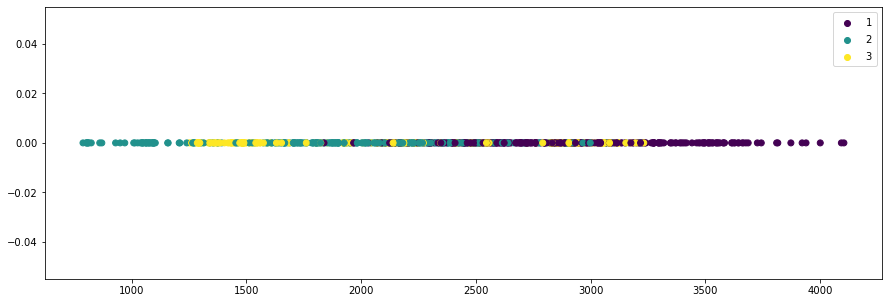

In [237]:
plt.figure(figsize=(15,5))
fig = plt.scatter(area_train,np.zeros_like(area_train),c=label_train)
plt.legend(*fig.legend_elements())

In [42]:
from skimage import measure

In [264]:
xaxis_feature = []
yaxis_feature = []

for i in range(proj.n_index):
    temp_rg = measure.regionprops((mask_img[i]))
    yaxis_feature.append( temp_rg[0].convex_image.shape[0] )
    xaxis_feature.append( temp_rg[0].convex_image.shape[1] )
xaxis_feature = np.array(xaxis_feature)
yaxis_feature = np.array(yaxis_feature)

In [265]:
xaxis_feature = xaxis_feature.reshape(-1,1)
xaxis_train,xaxis_test = train_test_split(xaxis_feature,0.7,idx)

yaxis_feature = yaxis_feature.reshape(-1,1)
yaxis_train,yaxis_test = train_test_split(yaxis_feature,0.7,idx)

In [267]:
print_class_sep(xaxis_train,label_train)

--Divergence--
D01 = 0.588869010928875
D02 = -0.2256842235424587
D10 = 0.700926117977246
D12 = 0.04855908705199996
D20 = 1.0624178739218948
D21 = 1.0980628025532557
Divergence = 3.273150668890813
Scatter Matrix J3 = 1.0005883290248754
Fisher discriminant ratio = 0.7378817705870909
(fisher class1,2 = 0.1610174275693106),class1,3 = 0.4883345308979983),class2,3 = 0.08852981211978206)


In [268]:
print_class_sep(yaxis_train,label_train)

--Divergence--
D01 = 0.03599227144014258
D02 = 0.0
D10 = 0.019213143034898163
D12 = 0.38054394604681424
D20 = 0.0
D21 = 0.6927785468684469
Divergence = 1.1285279073903018
Scatter Matrix J3 = 1.0208018433299484
Fisher discriminant ratio = 25.41575641702337
(fisher class1,2 = 9.645776466976626),class1,3 = 15.151116854641362),class2,3 = 0.6188630954053851)


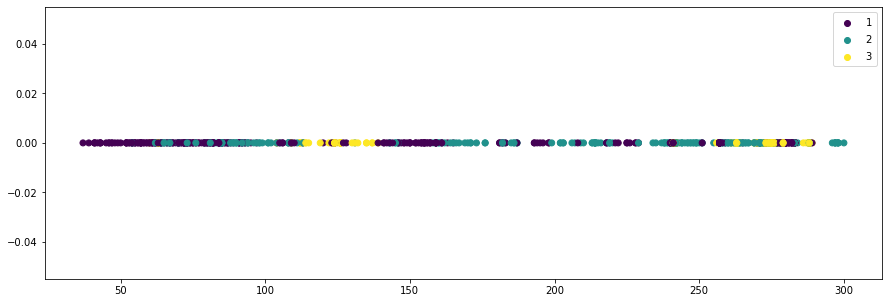

In [272]:
plt.figure(figsize=(15,5))
fig = plt.scatter(xaxis_train,np.zeros_like(area_train),c=label_train)
plt.legend(*fig.legend_elements())

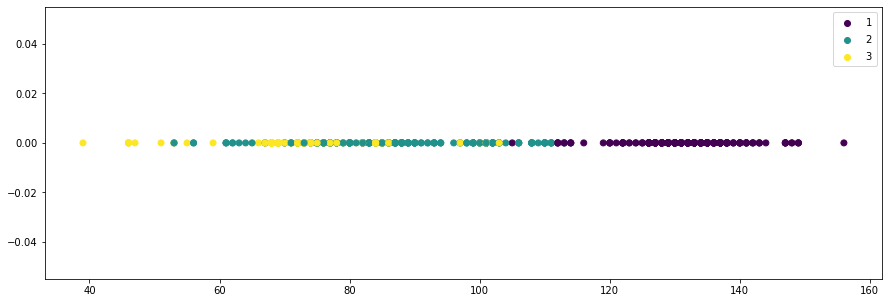

In [271]:
plt.figure(figsize=(15,5))
fig = plt.scatter(yaxis_train,np.zeros_like(area_train),c=label_train)
plt.legend(*fig.legend_elements())

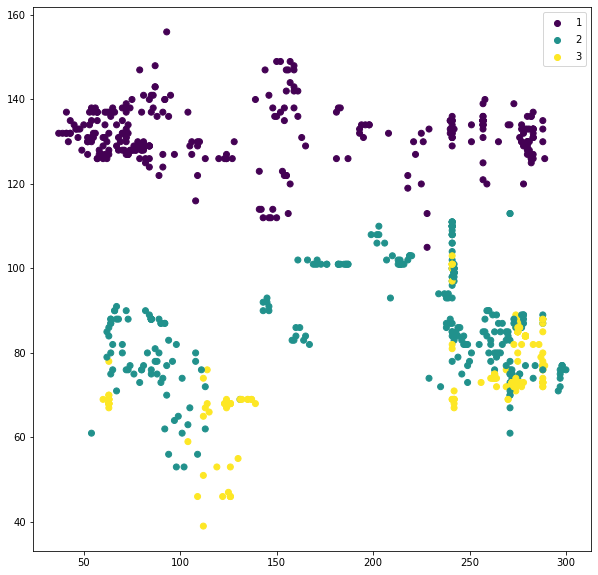

In [297]:
plt.figure(figsize=(10,10))
fig = plt.scatter(xaxis_train,yaxis_train,c=label_train)
plt.legend(*fig.legend_elements())

In [285]:
knn_rgx = KNN(n_neighbors=3)
knn_rgx.fit(xaxis_train,label_train)
print(classification_report(label_test, knn_rgx.predict(xaxis_test) ))

              precision    recall  f1-score   support

         1.0       0.69      0.66      0.67       131
         2.0       0.54      0.54      0.54       106
         3.0       0.73      0.77      0.75       118

    accuracy                           0.66       355
   macro avg       0.65      0.66      0.65       355
weighted avg       0.66      0.66      0.66       355



In [282]:
knn_rgy = KNN(n_neighbors=5)
knn_rgy.fit(yaxis_train,label_train)
print(classification_report(label_test, knn_rgy.predict(yaxis_test) ))

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       131
         2.0       0.72      0.78      0.75       106
         3.0       0.80      0.73      0.76       118

    accuracy                           0.85       355
   macro avg       0.84      0.84      0.84       355
weighted avg       0.85      0.85      0.84       355



In [300]:
xyaxis_train = np.dstack((xaxis_train,yaxis_train)).reshape(-1,2)
xyaxis_test = np.dstack((xaxis_test,yaxis_test)).reshape(-1,2)

In [303]:
xyaxis_train.shape

(826, 2)

In [305]:
knn_xy = KNN(n_neighbors=3)
knn_xy.fit(xyaxis_train,label_train)
print(classification_report(label_test, knn_xy.predict(xyaxis_test) ))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       131
         2.0       0.91      0.91      0.91       106
         3.0       0.92      0.92      0.92       118

    accuracy                           0.95       355
   macro avg       0.94      0.94      0.94       355
weighted avg       0.95      0.95      0.95       355



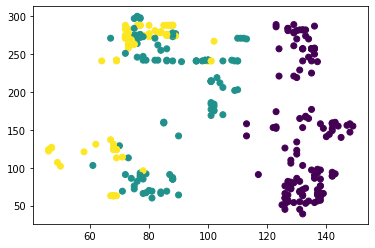

In [195]:
plt.scatter(rg_test[:,0],rg_test[:,1],c=label_test)

In [260]:
rg = measure.regionprops((mask_img[786]))

In [261]:
rg[0].convex_image.shape

(67, 242)

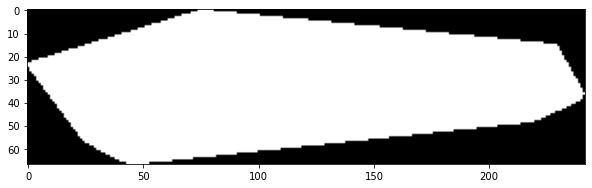

In [262]:
plt.figure(figsize=(10,10))
plt.imshow(rg[0].convex_image,cmap='gray')

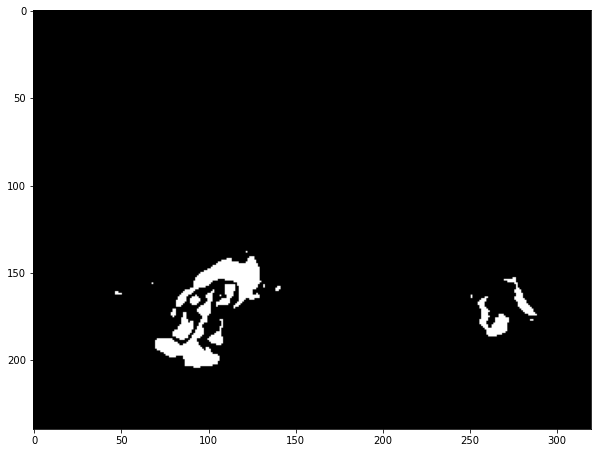

In [259]:
plt.figure(figsize=(10,10))
plt.imshow(mask_img[786],cmap='gray')